In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
import scipy.optimize as op
from scipy import stats

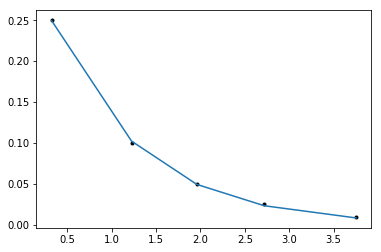

In [2]:
alpha = np.array([0.25, 0.10, 0.05, 0.025, 0.01])
tm = np.array([0.326, 1.225, 1.960, 2.719, 3.752])


def exponential(theta, x):
    return theta[0]*np.exp(-x/theta[1])

def res_fxn(theta, x, y):
    return y - exponential(theta,x)


theta_guess = [tm[0], 1]
theta_fit, success = op.leastsq(res_fxn, theta_guess, args=(tm, alpha))


plt.figure()
plt.plot(tm, alpha, "k.")
plt.plot(tm, exponential(theta_fit, tm))
plt.show()

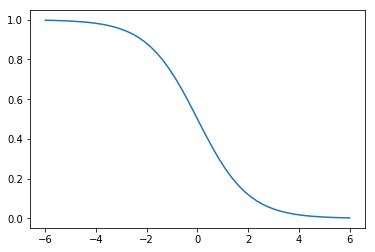

In [36]:
z = np.linspace(-6,6)

plt.plot(z, 1/(1+np.exp(z)))

In [62]:
def extrapolated_anderson_ksamp(x1, x2):
    A, cv, p = stats.anderson_ksamp([x1, x2])

    alpha = np.array([0.25, 0.10, 0.05, 0.025, 0.01, 0.005, 0.001])
    
    
    #res_fxn = lambda theta, x, y: y - theta[0]*np.exp(-x/theta[1])
    res_fxn = lambda theta, x, y: y - 1/(1 + theta[0]*np.exp(x/theta[1]))
    
    fit, success = op.leastsq(res_fxn, [0.25, 1], args=(cv, alpha))
    
    z = np.linspace(-2,6)
    p_new = 1/(1 + fit[0]*np.exp(A/fit[1]))
    
    plt.figure()
    plt.plot(cv, alpha, "ko")
    plt.plot(z, 1/(1 + fit[0]*np.exp(z/fit[1])))
    plt.axvline(A, c="orange")
    plt.axhline(p_new, c="orange")
    plt.show()
    
    return A, p_new

/Users/research/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: p-value capped: true value larger than 0.25
  


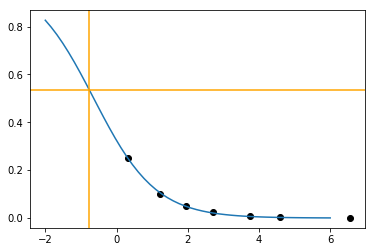

(-0.7651579254141143, 0.5356705134226948)

In [94]:
x1 = np.random.normal(0, 1, size=25)
x2 = np.random.normal(0, 1, size=32)

extrapolated_anderson_ksamp(x1, x2)